In [51]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import time
import pandas as pd

In [52]:
class rand_move_3d():
    def __init__(self):
        self.position = np.array([0,0,0])
        self.path = self.position.reshape(3,1)
        self.step = 0
        self.back = np.array([])

    def rand_walk(self, steps):
        walk = np.random.choice(np.arange(6), steps, True)
        new_path = np.zeros((3,steps))
        new_path[0][walk==0] += 1
        new_path[0][walk==1] -= 1
        new_path[1][walk==2] += 1
        new_path[1][walk==3] -= 1
        new_path[2][walk==4] += 1
        new_path[2][walk==5] -= 1
        new_path = np.cumsum(new_path, axis=1) + self.position.reshape(3,1)
        
        self.path = np.hstack((self.path, new_path))
        self.position = self.path[:,-1]
        self.step += steps
        new_back = np.zeros(steps)

        if self.back.shape[0] > 0 and self.back[-1] == 1:
            new_back = 1
        else:
            origin = np.array([0,0,0])
            for i in range(self.step):
                if ( self.path[:, i+1] == origin ).all():
                    new_back[i:] = 1
                    break

        self.back = np.hstack((self.back, new_back))


    def plot_path(self, savepath=None):
        fig = plt.figure()
        ax = Axes3D(fig)

        ax.plot(self.path[0], self.path[1], self.path[2], 'b.-')
        if savepath:
            fig.savefig(savepath)
        fig.show()


class batch_walk():
    def __init__(self, size):
        self.size = size
        self.persons = [rand_move_3d() for i in range(size)] if size else None

    # # 重新设置batch size
    # def reset_size(self, size):
    #     if self.size is None:
    #         self.persons = [rand_move_3d() for i in range(size)]
    #     elif size < self.size:
    #         self.persons = self.persons[:size]
    #     elif size > self.size:
    #         self.persons += [rand_move_3d() for i in range(size - self.size)]

    def test(self, N):
        '''
        N: the number of steps
        '''
        self.n = N
        self.p = np.zeros(N)
        count = np.zeros(N)
        start_time = time.time()
        for i in range(self.size):
            self.persons[i].rand_walk(N)
            count += self.persons[i].back

        self.p = count/self.size
        end_time = time.time()
        # print('run time = {}'.format(end_time - start_time))
        # print('final percentage = {:.3f}'.format(self.p[-1]))
        return self.p
                
    
    def plot_p(self, p=None, savepath=None):
        plt.figure()
        x = np.arange(self.n)
        if p is None:
            p = self.p
        plt.plot(x, p, 'b.-')
        plt.xlabel('steps')
        plt.ylabel('percentage of back to origin')
        plt.title('size = {:}'.format(self.size))
        if savepath:
            plt.savefig(savepath)
        plt.show()

In [53]:
def para_test(size, step, N):
    p = np.zeros(step)
    for _ in range(N):
        B = batch_walk(size)
        p += B.test(step)
    p /= N
    B.plot_p(p=p, savepath='rand_move_{:}_{:}_{:}.jpg'.format(size,step,N))
    return p

def paras_test(size_list, step_list, N):
    df = pd.DataFrame(np.zeros((len(size_list), len(step_list))))
    for i,size in enumerate(size_list):
        # for N in N_list:
        p = para_test(size, step_list[-1], N)
        df.loc[i,:] = p[step_list-1]
        print('size = {} is done'.format(size))
    df.index = size_list
    df.columns = step_list
    return df

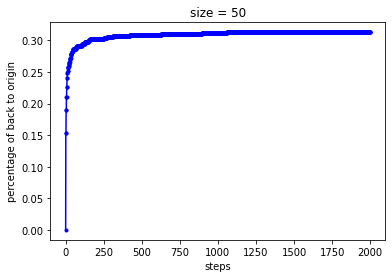

size = 50 is done


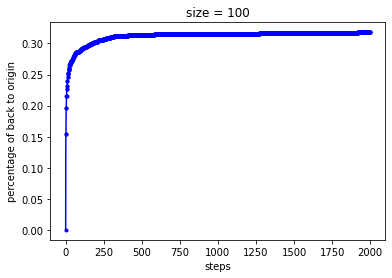

size = 100 is done


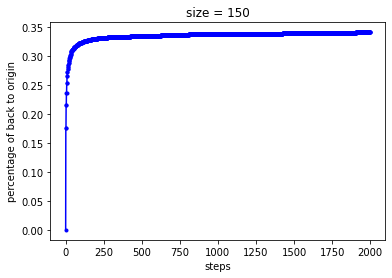

size = 150 is done


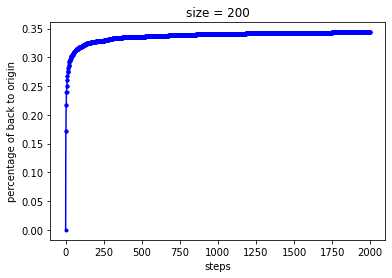

size = 200 is done


,400,800,1200,1600,2000
50,0.307000,0.311000,0.313000,0.313000,0.313000
100,0.312500,0.315000,0.315500,0.317500,0.318000
150,0.332667,0.336667,0.338333,0.339667,0.340667
200,0.334500,0.339250,0.341500,0.342750,0.343500


In [59]:
size_list  = np.array([50*i for i in range(1, 5)])
step_list = np.array([400 * i for i in range(1, 6)])
N = 20

df = paras_test(size_list, step_list, N)
df

In [60]:
with open('df_latex.txt','w') as tf:
    tf.write(df.to_latex())